In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# PCA on iris data

We will again use the iris data set which you you know from previous exercises. The goal is to perform a Principal Component Analysis (PCA) and derive with a new feature subspace. You can use nay pre-built e.g. numpy functions for the computations.


## a)

What are the major steps in performing a PCA? You can write down pseudo code.

In [ ]:
# pseudo code

# remove mean
X = X_0 - mu_X_0

# calculate sample covariance
cov = 1/n X@X.T

# calculate EVD 
V,LAM = EVD(X)

# pick the d largest eigenvalues
V_d = max(V, d)

# project data onto V_d
Z = V_d.TX

# whitening
Z= LAM^0.5@V_d.T@X

## b)

Compute the 4x4 covariance matrix for the iris data set.

In [2]:
# load the iris data set
data = pd.read_csv('data/iris.data.txt', names = ['sl','sw','pl','pw','iris_type'])

target = np.array(data.iris_type)
target[data.iris_type == "Iris-setosa"] = 0
target[data.iris_type == "Iris-versicolor"] = 1
target[data.iris_type == "Iris-virginica"] = 2

X = np.array((data.sl,data.sw, data.pl, data.pw))

In [3]:
def cov_samp(X):
    D,n = X.shape 

    cov = 1/n * X@X.T 
    
    return(cov)


In [4]:
cov_X = cov_samp(X)
print("covariance matrix:")
print(cov_X)

covariance matrix:
[[34.82566667 17.80653333 23.22833333  7.51766667]
 [17.80653333  9.51366667 11.1594      3.54353333]
 [23.22833333 11.1594     17.22        5.79313333]
 [ 7.51766667  3.54353333  5.79313333  2.01533333]]


## c)

Perform an eigendecomposition on the covariance matrix. That means compute the eigenvalues and eigenvectors.

In [5]:
# EVD
LAM,V = np.linalg.eigh(cov_X)

In [6]:
print("eigenvalues: ")
print(LAM)

eigenvalues: 
[2.35354111e-02 8.02401290e-02 2.09402049e+00 6.13768706e+01]


## d)

Project your 4 dimensional feature space onto a 2 dimensional feature subspace derived from the first two principal components. Show the scatter plot and explain whether you see any effect.

In [7]:
V_d = V[:,-2:]
LAM_diag = np.diag(LAM[-2:])

# without whitening 
Z = V_d.T @ X

# with whitening
Z_w = (LAM_diag**0.5) @ V_d.T @ X


Text(0.5,1,'Z with whitening')

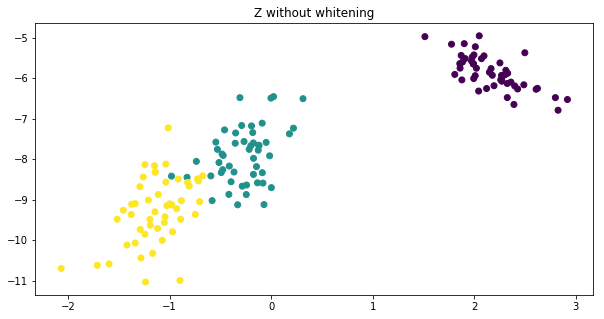

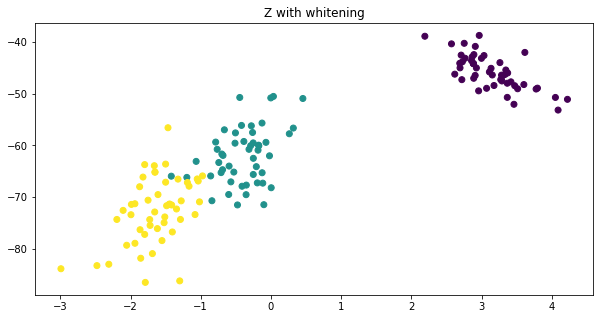

In [ ]:
# Z without whitening
plt.figure(figsize=(10,5))

plt.scatter(Z[0], Z[1], c=target)

plt.title('Z without whitening')

# Z with whitening 
plt.figure(figsize=(10,5))

plt.scatter(Z_w[0], Z_w[1], c=target)

plt.title('Z with whitening')


